LIBRARY

In [38]:
import pandas as pd
import numpy as np

In [39]:
df = pd.read_csv('tugas akhir.csv')
df.sample()

,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,...,p14,p15,p16,p17,p18,p19,p20,p21,p22,p23
85,Jawa Barat,PTN,Laki-laki,Bersama sanak family,Ya,Jarang,Kadang-kadang,Sering,Jarang,Jarang,...,Jarang,3,2,4,3,4,4,2,3,4


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1584 entries, 0 to 1583
Data columns (total 23 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   p1      1584 non-null   object
 1   p2      1584 non-null   object
 2   p3      1584 non-null   object
 3   p4      1584 non-null   object
 4   p5      1584 non-null   object
 5   p6      1584 non-null   object
 6   p7      1584 non-null   object
 7   p8      1584 non-null   object
 8   p9      1584 non-null   object
 9   p10     1584 non-null   object
 10  p11     1584 non-null   object
 11  p12     1584 non-null   object
 12  p13     1584 non-null   object
 13  p14     1584 non-null   object
 14  p15     1584 non-null   int64 
 15  p16     1584 non-null   int64 
 16  p17     1584 non-null   int64 
 17  p18     1584 non-null   int64 
 18  p19     1584 non-null   int64 
 19  p20     1584 non-null   int64 
 20  p21     1584 non-null   int64 
 21  p22     1584 non-null   int64 
 22  p23     1584 non-null   

In [41]:
df['p23'] = pd.cut(df['p23'], bins=[0, 3, 6], labels=['0', '1'])


In [42]:
numerical = []
catgcols = []

for col in df.columns:
    if df[col].dtype == 'int64':
        numerical.append(col)
    else:
        catgcols.append(col)

for col in df.columns:
    if col in numerical:
        df[col].fillna(df[col].median(), inplace = True)
    else:
        df[col].fillna(df[col].mode()[0], inplace = True)

In [43]:
numerical

['p15', 'p16', 'p17', 'p18', 'p19', 'p20', 'p21', 'p22']

In [44]:
catgcols

['p1',
 'p2',
 'p3',
 'p4',
 'p5',
 'p6',
 'p7',
 'p8',
 'p9',
 'p10',
 'p11',
 'p12',
 'p13',
 'p14',
 'p23']

In [45]:
df['p23'].value_counts()



p23
1    1049
0     535
Name: count, dtype: int64

In [46]:
ind_col = [col for col in df.columns if col != 'p23']
dep_col = 'p23'

TRANSFORMASI DATASET

In [47]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in catgcols:
    df[col] = le.fit_transform(df[col])

In [48]:
df['p23'] = le.fit_transform(df['p23'])

In [49]:
x = df[ind_col]
y = df[dep_col]

In [50]:
df.head()

,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,...,p14,p15,p16,p17,p18,p19,p20,p21,p22,p23
0,7,0,1,5,2,0,3,1,1,1,...,3,2,2,2,2,3,2,2,2,0
1,3,0,0,13,2,1,1,2,0,0,...,4,5,5,5,5,5,5,5,6,1
2,14,0,1,13,2,0,0,3,0,4,...,0,4,5,2,2,5,3,3,5,1
3,12,0,1,13,2,3,1,2,3,4,...,3,4,6,4,4,2,4,5,6,0
4,22,0,1,5,2,1,0,3,1,1,...,1,5,5,5,4,4,4,5,6,1


In [51]:
df.to_csv('tugas_akhir.csv')

In [52]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.20, random_state = 0)

DECISION TREE

In [53]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree


dtc = DecisionTreeClassifier(
    ccp_alpha=0.0, class_weight=None, criterion='entropy', max_depth=4, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, random_state=42, splitter='best'
)

model = dtc.fit(x_train, y_train)

dtc_acc = accuracy_score(y_test, dtc.predict(x_test))

print(f'akurasi data training = {accuracy_score(y_train, dtc.predict(x_train))}')
print(f'akurasi data testing = {dtc_acc}')

print(f'confusion_matrix = \n{confusion_matrix(y_test, dtc.predict(x_test))}')
confusion = confusion_matrix(y_test, dtc.predict(x_test))
fp = confusion.ravel()
print(f'classification_report = \n{classification_report(y_test, dtc.predict(x_test))}')

akurasi data training = 0.8291139240506329
akurasi data testing = 0.7287066246056783
confusion_matrix = 
[[173 253]
 [ 91 751]]
classification_report = 
              precision    recall  f1-score   support

           0       0.66      0.41      0.50       426
           1       0.75      0.89      0.81       842

    accuracy                           0.73      1268
   macro avg       0.70      0.65      0.66      1268
weighted avg       0.72      0.73      0.71      1268



In [54]:
input_data = (13,0,1,13,2,1,0,3,1,0,0,0,3,1,3,2,3,3,4,3,3,4)

input_data_as_numpy_array = np.array(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = dtc.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
    print('Kurang Percaya Diri')
else:
    print('Percaya Diri')

    

[0]
Kurang Percaya Diri


d:\Anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


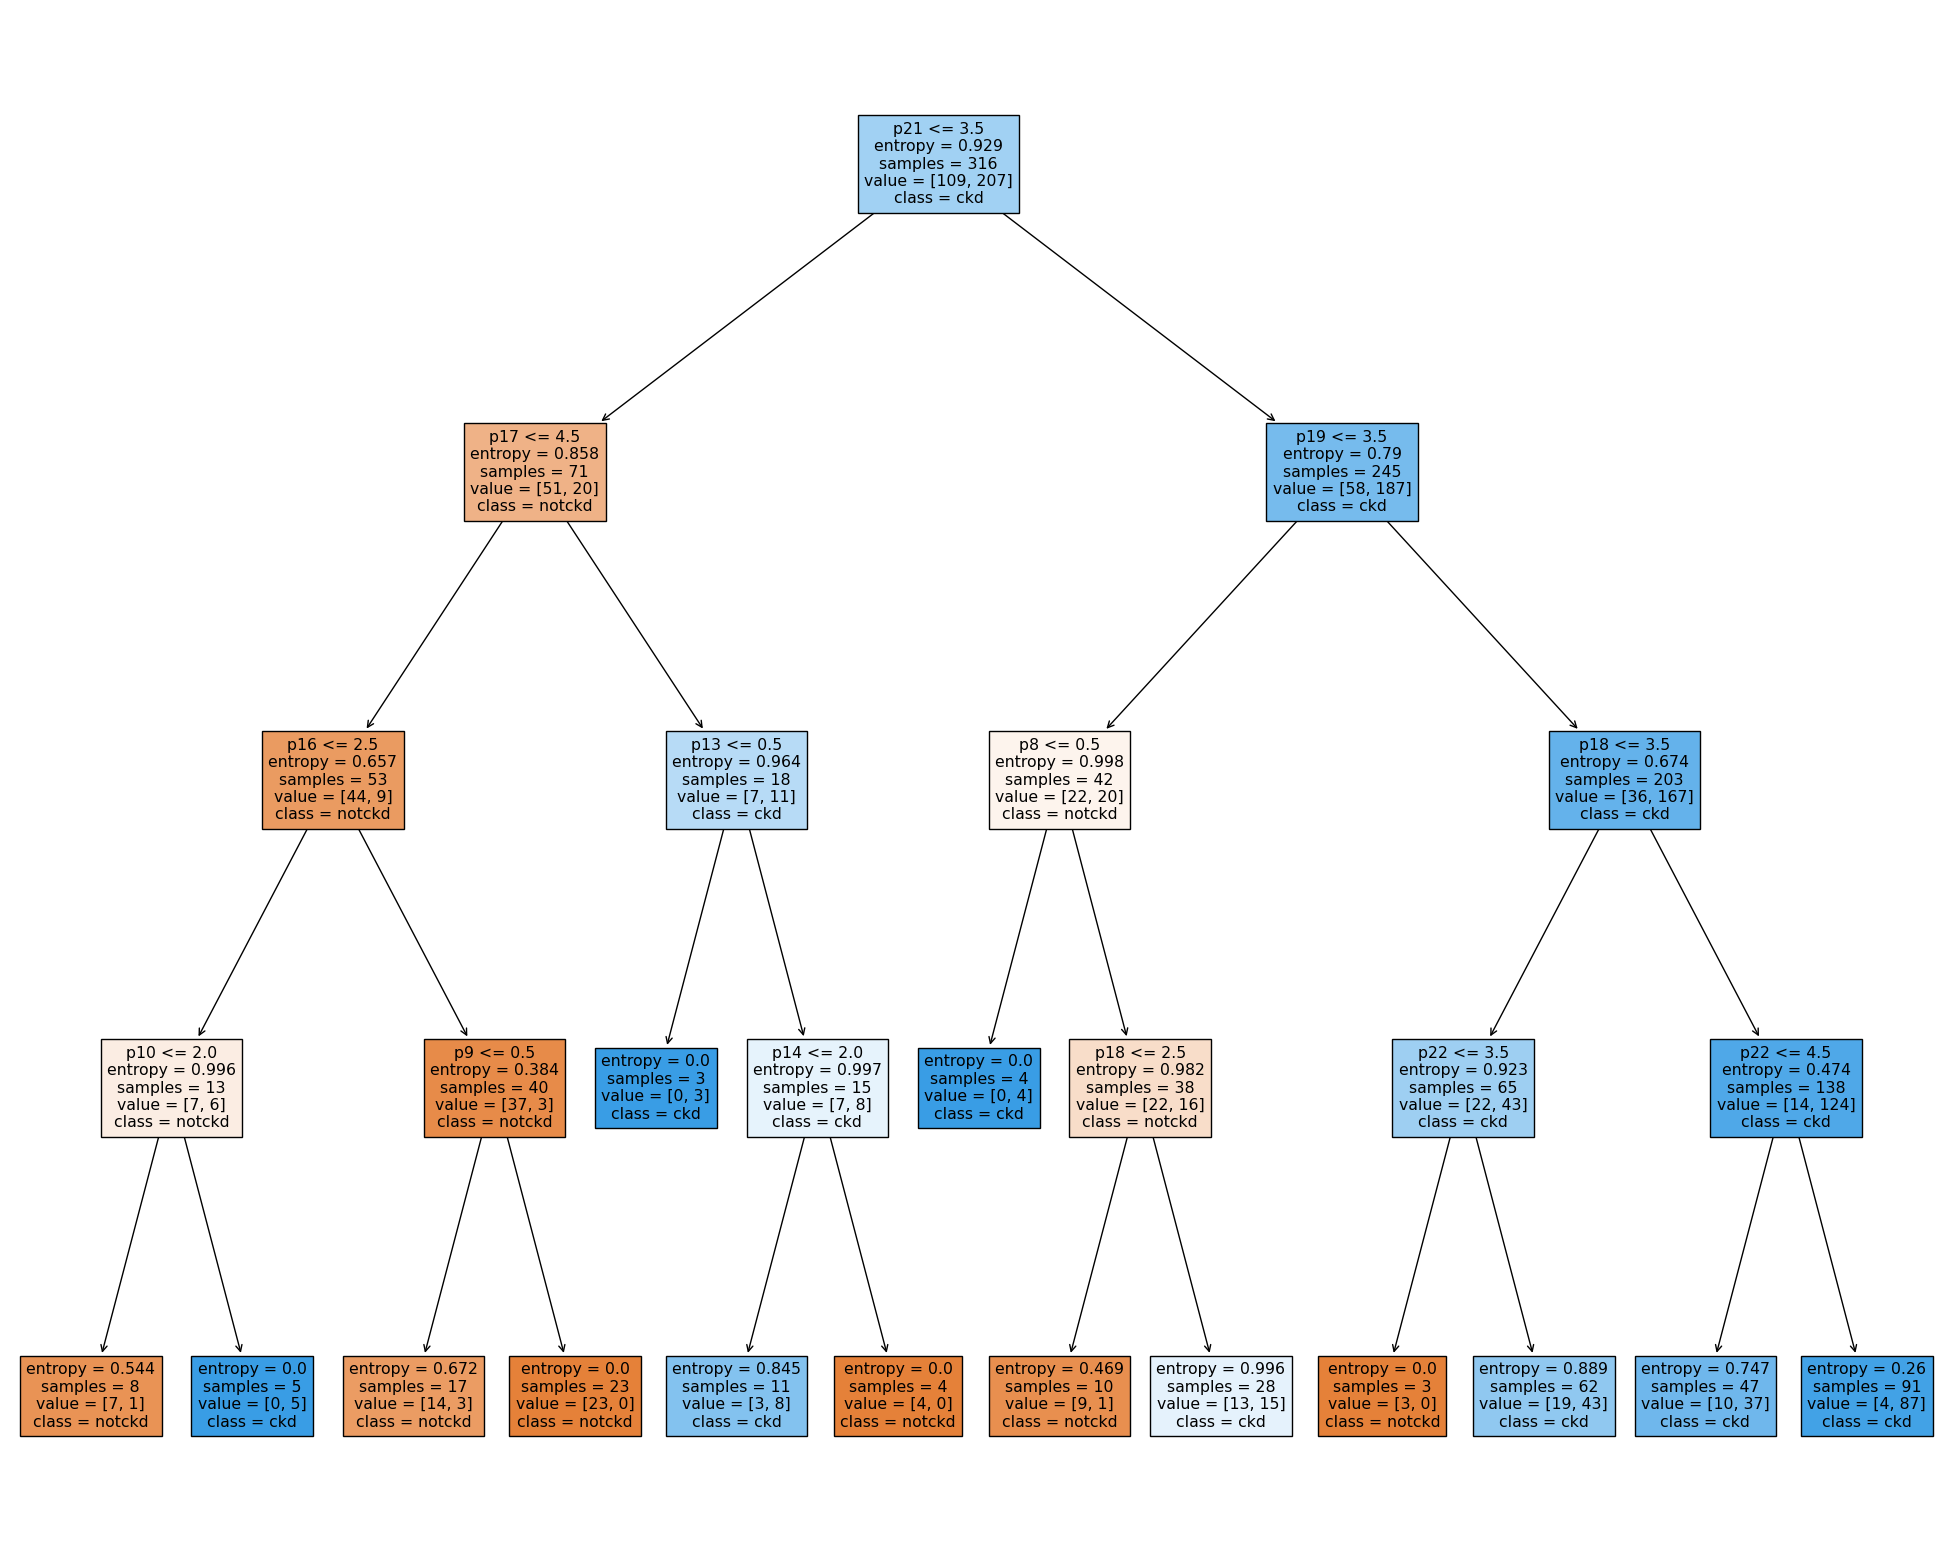

In [55]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model, 
                   feature_names=ind_col,  
                   class_names=['notckd', 'ckd'],
                   filled=True)